In [71]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('ice_cream_sales.csv')

La correlación no tiene sentido 

In [73]:
df.corr()['sales']['price']

0.07554365164568472

Crea X y Y 

In [74]:
target = 'sales'

X = df.drop(target, axis=1)
X['price'] = X.price.round()
y = df[target]


Crea el modelo 

In [75]:
model = xgb.XGBRegressor(max_depth=3, n_estimators=100)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

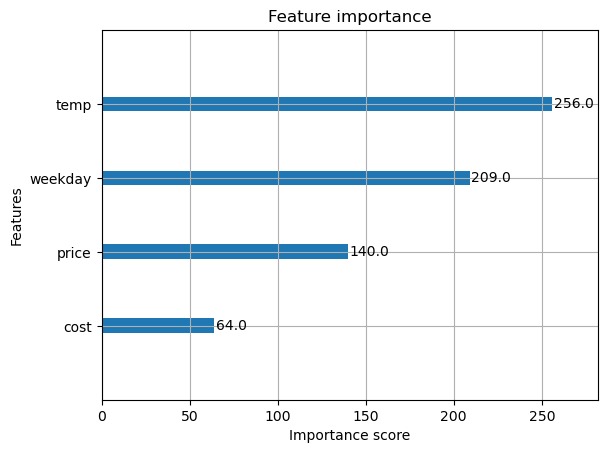

In [76]:
# Plot feature importance
xgb.plot_importance(model)

Distribución del precio

<Axes: >

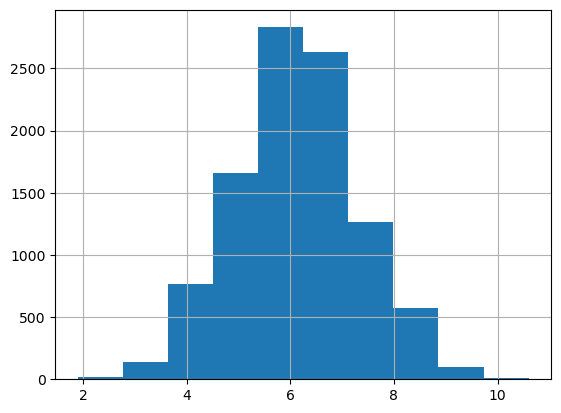

In [77]:
df.price.hist()

# Crea un S learner

In [78]:
price = [4,5,6,7,8,]

In [79]:
ejemplo = X.iloc[[0]]
ejemplo

,temp,weekday,cost,price
0,17.3,6,1.5,6.0


In [80]:
simulaciones = []

for i in price:
    counterfactual = ejemplo.copy()
    counterfactual['price']=i
    simulaciones.append(model.predict(counterfactual)[0])

Text(0, 0.5, 'Ventas')

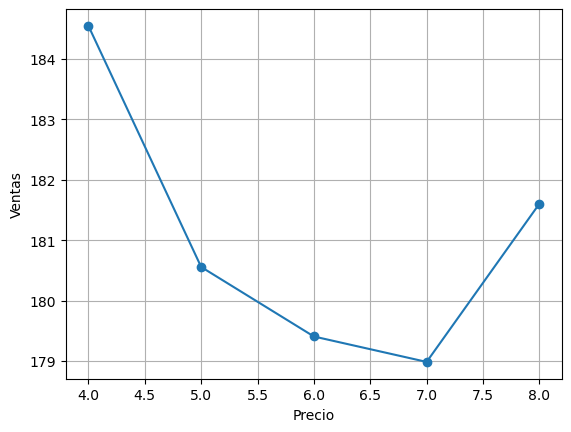

In [81]:
plt.plot(price, simulaciones, marker = "o")
plt.grid()
plt.xlabel('Precio')
plt.ylabel('Ventas')

In [82]:
X['price'].value_counts()

price
6.0     3514
7.0     2262
5.0     1956
8.0     1106
4.0      835
9.0      212
3.0       84
10.0      20
2.0        9
11.0       2
Name: count, dtype: int64